<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [86]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [87]:
hh_data.head(3)
hh_data.tail(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


In [88]:
hh_data.shape

(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [89]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [90]:
hh_data.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [91]:
hh_data.describe(include = "all")

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [92]:
#создадим функцию определяющую категорию образования
def get_level_education(x):
    if 'Высшее образование' in x:
        return 'Высшее образование'
    elif 'Неоконченное высшее' in x:
        return 'Неоконченное высшее'
    elif 'Среднее специальное образование' in x:
        return 'Среднее специальное'
    elif 'Среднее образование' in x:
        return 'Среднее образование'

# передадим функцию и создадим столбец с новым признаком    
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: get_level_education(x))
# удалим столбец Образование и ВУЗ
hh_data = hh_data.drop(['Образование и ВУЗ'], axis=1)
hh_data.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее образование
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное


In [93]:
hh_data['Образование'].value_counts()

Высшее образование     33863
Среднее специальное     5763
Неоконченное высшее     4561
Среднее образование      557
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [94]:
# создадим функцию определяющую пол
def get_sex(x):
    if 'Мужчина' in x:
        return 'М'
    elif 'Женщина' in x:
        return 'Ж'

# создадим функцию определяющую возраст
def get_age(x):
    age = x.split(' ')
    return int(age[3])

# передадим функцию и создадим столбец с новым признаком    
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: get_sex(x))
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: get_age(x))
# удалим столбец Пол, возраст
hh_data = hh_data.drop(['Пол, возраст'], axis=1)
hh_data.head(3)

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее образование,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36


In [95]:
hh_data['Пол'].value_counts(normalize=True)

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64

In [96]:
hh_data['Возраст'].mean()

32.19674146254246

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [97]:
#создадим функцию, которая заменяет скрытые пропуски 'Не указано' на NaN
def nan(x):
    if x == 'Не указано':
        return np.nan
    else:
        return x
# выполним преобразование скрытых пропусков
hh_data['Опыт работы'] = hh_data['Опыт работы'].apply(lambda x: nan(x))


# создадим функцию которая определяет количество опыт работы в месяцах
def get_experience(x):
    if pd.isnull(x) == True:
        return np.nan
    else:
        month_key_words = ['месяц', 'месяцев', 'месяца']
        year_key_words = ['год', 'лет', 'года']
        x_splited = x.split(' ')
        month1 = 0
        month2 = 0
        year = 0
        if x_splited[3] in year_key_words:
            year = int(x_splited[2])*12
        if x_splited[3] in month_key_words:
            month1 = int(x_splited[2])
        if x_splited[5] in month_key_words:
            month2 = int(x_splited[4])
        return year + month1 + month2

# выделим при помощи этой функции новый признак "Опыт работы (месяц)"
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(lambda x: get_experience(x))

# удалим столбец Опыт работы
hh_data = hh_data.drop(['Опыт работы'], axis=1)
hh_data.head(3)   

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее образование,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0


In [98]:
hh_data['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [99]:
#создадим функцию определяющую город
def get_city(x):
    city = x.split(' ')
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    if city[0] == 'Москва':
        return 'Москва'
    if city[0] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    if city[0] in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# создадим функцию определяющую готовность к переезду
def get_moving(x):
    if 'не готова к переезду' in x or 'не готов к переезду' in x:
        return False
    else:
        return True

# создадим функцию определяющую готовность к командировкам
def get_business_trip(x):
    if 'командировкам' not in x:
        return False
    if 'не готов к командировкам' in x or 'не готова к командировкам' in x:
        return False
    else:
        return True

#создадим соответствующие столбцы в таблице
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(lambda x: get_city(x))
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(lambda x: get_moving(x))
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(lambda x: get_business_trip(x))
# удалим столбец Город, переезд, командировки
hh_data = hh_data.drop(['Город, переезд, командировки'], axis=1)
hh_data.head(3)

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее образование,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,другие,False,False


In [100]:
hh_data['Город'].value_counts(normalize=True)

Москва              0.371469
другие              0.367692
город-миллионник    0.150501
Санкт-Петербург     0.110339
Name: Город, dtype: float64

In [101]:
hh_data[(hh_data['Готовность к переезду'] == True) & (hh_data['Готовность к командировкам'] == True)].shape[0] / hh_data['Город'].shape[0]

0.3186572501340962

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [102]:
#создадим функции, которые вычленяют соответствующий признак из Занятости
def get_full_employment(x):
    if 'полная занятость' in x:
        return True
    else:
        return False
    
def get_part_time_employment(x):
    if 'частичная занятость' in x:
        return True
    else:
        return False
    
def get_project_work(x):
    if 'проектная работа' in x:
        return True
    else:
        return False
      
def get_internship(x):
    if 'стажировка' in x:
        return True
    else:
        return False
    
def get_volunteering(x):
    if 'волонтерство' in x:
        return True
    else:
        return False
    
def get_full_day(x):
    if 'полный день' in x:
        return True
    else:
        return False
    
def get_remote_work(x):
    if 'удаленная работа' in x:
        return True
    else:
        return False
    
def get_shift_work(x):
    if 'сменный график' in x:
        return True
    else:
        return False
    
def get_flexible_schedule(x):
    if 'гибкий график' in x:
        return True
    else:
        return False

def get_shift_method(x):
    if 'вахтовый метод' in x:
        return True
    else:
        return False   
    
#создадим соответствующие столбцы в таблице
hh_data['Полная занятость'] = hh_data['Занятость'].apply(lambda x: get_full_employment(x))
hh_data['Частичная занятость'] = hh_data['Занятость'].apply(lambda x: get_part_time_employment(x))
hh_data['Проектная работа'] = hh_data['Занятость'].apply(lambda x: get_project_work(x))
hh_data['Стажировка'] = hh_data['Занятость'].apply(lambda x: get_internship(x))
hh_data['Волонтерство'] = hh_data['Занятость'].apply(lambda x: get_volunteering(x))

hh_data['Полный день'] = hh_data['График'].apply(lambda x: get_full_day(x))
hh_data['Удаленная работа'] = hh_data['График'].apply(lambda x: get_remote_work(x))
hh_data['Сменный график'] = hh_data['График'].apply(lambda x: get_shift_work(x))
hh_data['Гибкий график'] = hh_data['График'].apply(lambda x: get_flexible_schedule(x))
hh_data['Вахтовый метод'] = hh_data['График'].apply(lambda x: get_shift_method(x))


# удалим столбцы Занятость и График
hh_data = hh_data.drop(['Занятость'], axis=1)
hh_data = hh_data.drop(['График'], axis=1)
hh_data.head(3)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Удаленная работа,Сменный график,Гибкий график,Вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее образование,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False


In [103]:
hh_data[(hh_data['Проектная работа'] == True) & (hh_data['Волонтерство'] == True)].shape[0]

436

In [104]:
hh_data[(hh_data['Вахтовый метод'] == True) & (hh_data['Гибкий график'] == True)].shape[0]

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [105]:
ExchangeRates = pd.read_csv('data/ExchangeRates.csv', sep=',')
ExchangeRates['date'] = pd.to_datetime(ExchangeRates['date']).dt.date
ExchangeRates.head(2)

,currency,per,date,time,close,vol,proportion
0,USD,D,2017-12-29,00:00,57.6291,0,1
1,USD,D,2017-12-30,00:00,57.6002,0,1


In [106]:
# приведем дату обновления резюме в интересующий нас формат
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
hh_data['date'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date

# выделим валюту из столбца ЗП, а также переведем валюту в стандарт ISO
def get_currency(x):
    currency_dict = {'руб.':'RUB','грн.': 'UFH', 'USD': 'USD', 'EUR': 'EUR', 'бел.руб.': 'BYN', 'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT'}
    currency = x.split(' ')
    return currency_dict[currency[1]]

hh_data['currency'] = hh_data['ЗП'].apply(lambda x: get_currency(x))

# выделим сумму из столбца ЗП
def get_salary(x):
    salary = x.split(' ')
    return int(salary[0])
hh_data['Сумма ЗП в валюте'] = hh_data['ЗП'].apply(lambda x: get_salary(x))

# обогатим нашу таблицу с резюме данными по курсам валют, объеденим таблицы по признаку даты и валюты
hh_data = hh_data.merge(
    ExchangeRates,
    on=['currency', 'date'],
    how='left'
)

hh_data['close'] = hh_data['close'].fillna(1)
hh_data['proportion'] = hh_data['proportion'].fillna(1)
hh_data['ЗП (руб)'] = hh_data['Сумма ЗП в валюте']*hh_data['close']/hh_data['proportion']

hh_data = hh_data.drop(['ЗП', 'per', 'time', 'vol', 'date', 'currency', 'close', 'proportion', 'Сумма ЗП в валюте'], axis=1)


hh_data.head()



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Удаленная работа,Сменный график,Гибкий график,Вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,Высшее образование,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-08-04,Не указано,Высшее образование,М,38,225.0,другие,...,True,True,False,False,False,True,False,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее образование,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

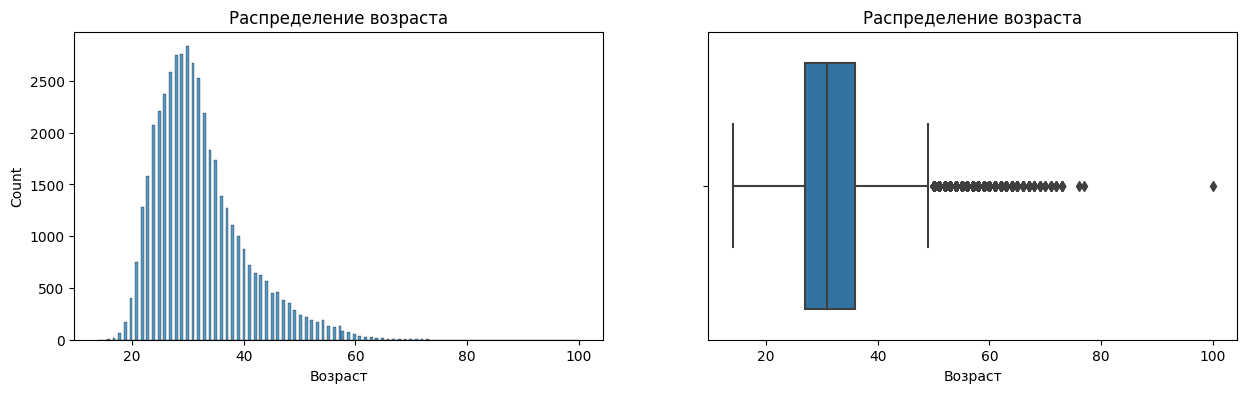

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=hh_data, x='Возраст', ax=axes[0]);
histplot.set_title('Распределение возраста');
boxplot = sns.boxplot(data=hh_data, x='Возраст', ax=axes[1]);
boxplot.set_title('Распределение возраста');

In [108]:
hh_data.describe()

,Возраст,Опыт работы (месяц),ЗП (руб)
count,44744.000000,44574.000000,4.474400e+04
mean,32.196741,114.418944,7.646430e+04
std,7.929800,79.047861,1.359040e+05
min,14.000000,1.000000,1.000000e+00
25%,27.000000,57.000000,3.700000e+04
50%,31.000000,100.000000,5.835573e+04
75%,36.000000,154.000000,9.411250e+04
max,100.000000,1188.000000,2.430488e+07


In [109]:
hh_data['Возраст'].mode()

0    30
Name: Возраст, dtype: int64

Мода распределения возраста кандидатов равна 30 годам. Предельные значения признака возраст равны минимум 14 годам и максимум 100 годам, хотя данное значение я отношу к выбросам. Это анаомалия. Также к аномалиям я бы отнес значения больше 60 лет, данные значения лежат за пределами возраста основной массы кандидатов и стремятся по количеству к нулю. Возраст большинства кандидатов лежит в диапазоне 27 - 36 лет. Среднее значение возраста 32 года, модальное значение 30 лет. Кривая распределения смещена влево, можно было бы сказать что от 20 до 38 лет кривая имеет нормальное распределение, а после 38-40 лет количество кандидатов плавно снижается.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

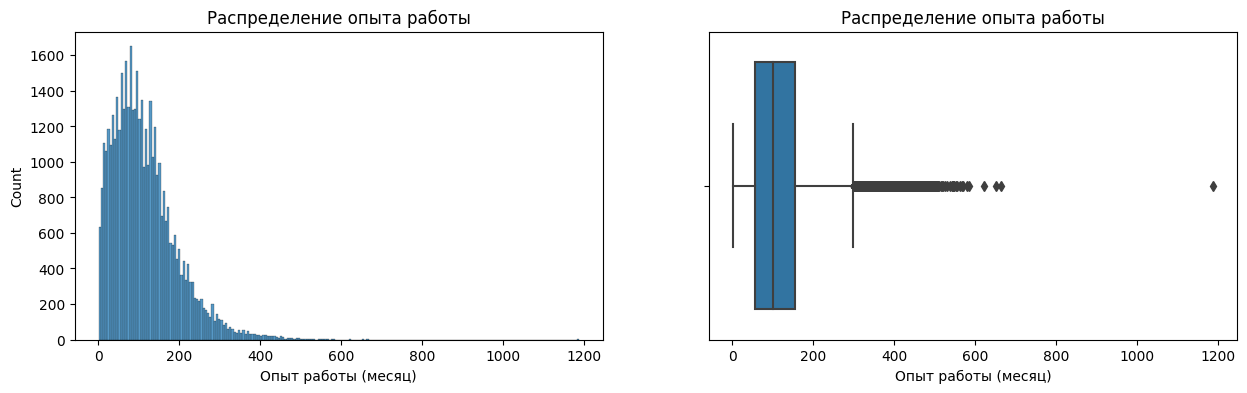

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=hh_data, x='Опыт работы (месяц)', ax=axes[0]);
histplot.set_title('Распределение опыта работы');
boxplot = sns.boxplot(data=hh_data, x='Опыт работы (месяц)', ax=axes[1]);
boxplot.set_title('Распределение опыта работы');

In [111]:
hh_data['Опыт работы (месяц)'].mode()

0    81.0
Name: Опыт работы (месяц), dtype: float64

Кривая распределения смещена влево, большинство кандидатов, судя по гистограмме, имеют опыт работы от 25 до 175 месяцев, мода распределения равна 81 месяцу. Минимальное значение опыта работы равно 1 месяцу, а максимальное 1188 месяцам, но это явная аномалия (99 лет). Так же к аномалиям я бы отнес несколько значений лежащих за пределами 600 месяцев (50 лет), не думаю что люди в возрасте, соответствующем этому опыту уже ищут работу.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


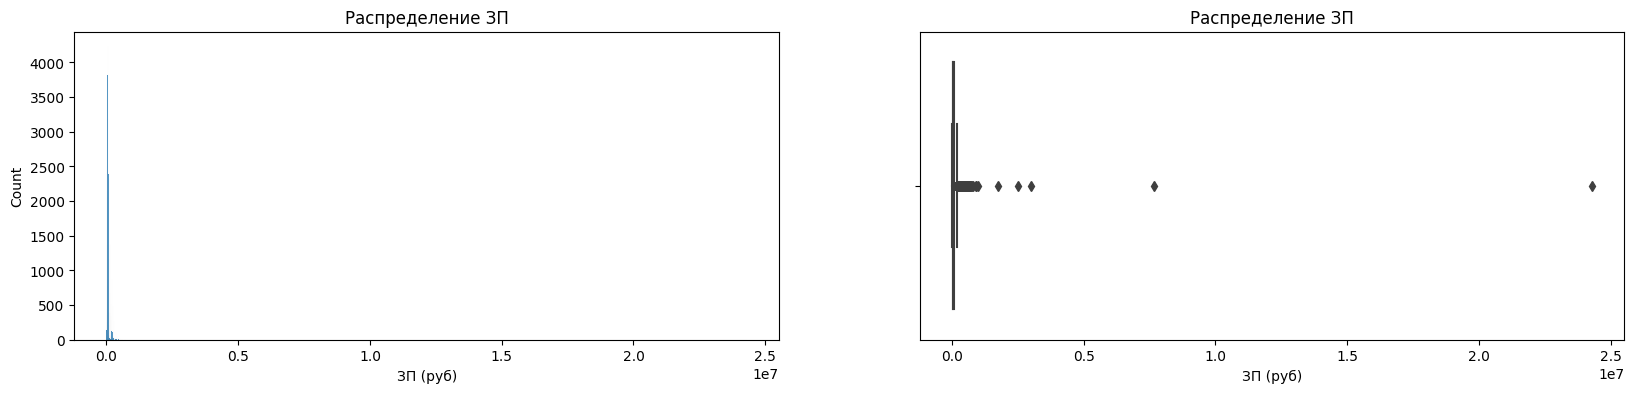

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
histplot = sns.histplot(data=hh_data, x='ЗП (руб)', ax=axes[0]);
histplot.set_title('Распределение ЗП');
boxplot = sns.boxplot(data=hh_data, x='ЗП (руб)', ax=axes[1]);
boxplot.set_title('Распределение ЗП');

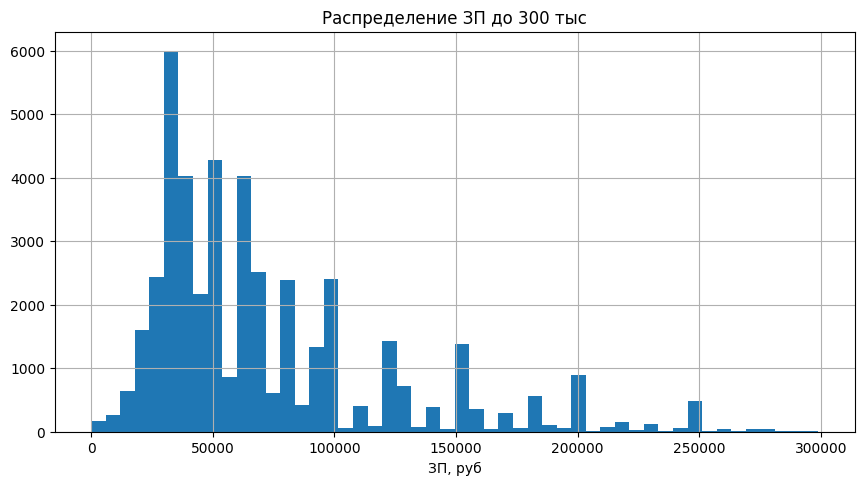

In [113]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.grid()
axes.set_title('Распределение ЗП до 300 тыс', fontsize=12)
axes.set_xlabel('ЗП, руб')
axes.hist(x=hh_data[hh_data['ЗП (руб)'] < 300000]['ЗП (руб)'], bins=50);

In [114]:
hh_data['ЗП (руб)'].mode()

0    50000.0
Name: ЗП (руб), dtype: float64

Поскольку выбросы сильно сжимают графики, я построил дополнительную гистограмму для диапазона ЗП до 300 тыс.руб. где лежит основная масса кандидатов. Минимальное значение ЗП 1 руб, а максимальное 243 млн. Это явные аномалии, как минимум, так и максимум. Основной диапазон заработных плат большинства кандидатов я бы отнес к 35000 - 70000 руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

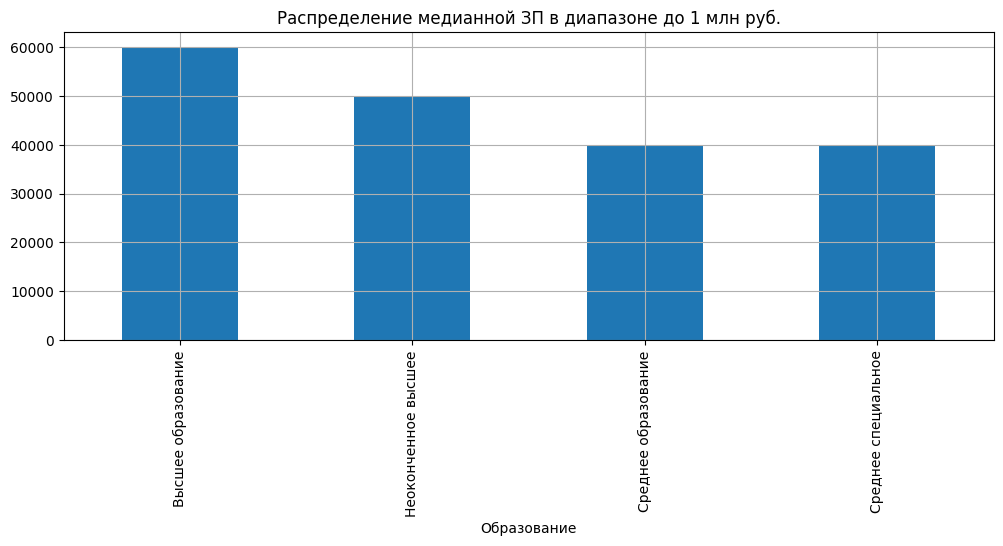

In [115]:
education = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby('Образование')['ЗП (руб)'].median()

education.plot(
    kind='bar',
    figsize=(12, 4),
    title='Распределение медианной ЗП в диапазоне до 1 млн руб.',
    grid = True,

);

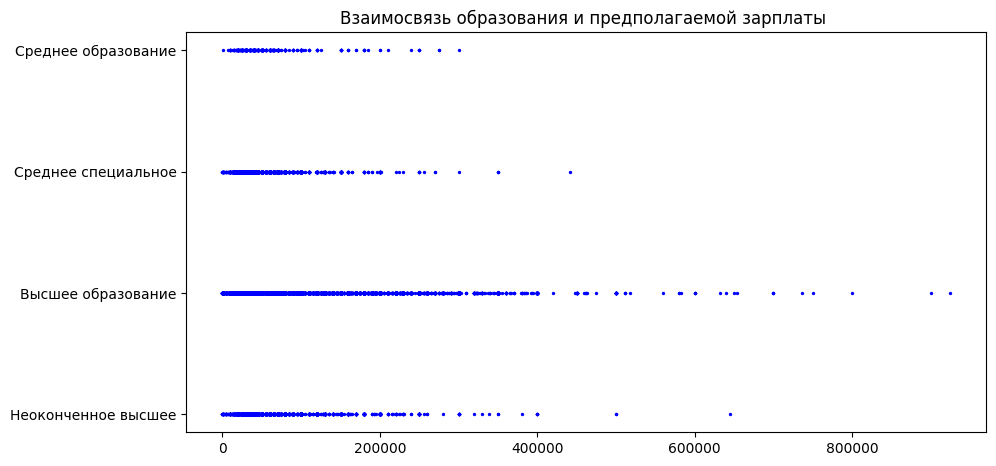

In [116]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Взаимосвязь образования и предполагаемой зарплаты ', fontsize=12)
axes.scatter(
    x=hh_data[hh_data['ЗП (руб)'] < 1000000]['ЗП (руб)'], 
    y=hh_data[hh_data['ЗП (руб)'] < 1000000]['Образование'], 
    s=2,
    marker='o',
    c = 'b'
);

Признак образования важен для прогнозирования ЗП. Так медианная ЗП у кандидатов с высшим оббразованием максимальна и составляет 60 т.р., а минимальные значения в 40 т.р. наблюдаются у кандидатов со средним и средним специальным образованием. Что интересно - так это то, что неоконченное образование у кандидатов дает медианнукю ЗП в 50 т.р.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

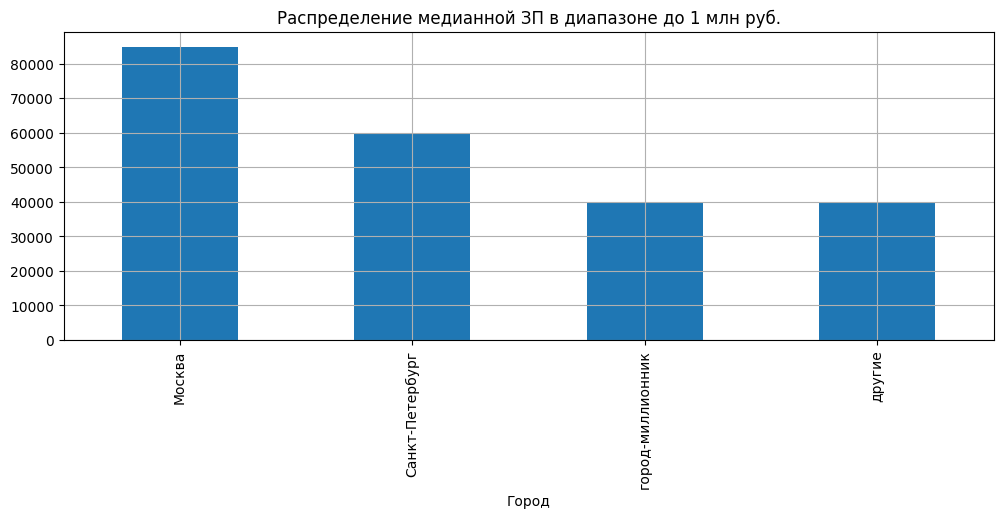

In [117]:
city_group = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby('Город')['ЗП (руб)'].median()

city_group.plot(
    kind='bar',
    figsize=(12, 4),
    title='Распределение медианной ЗП в диапазоне до 1 млн руб.',
    grid = True,

);



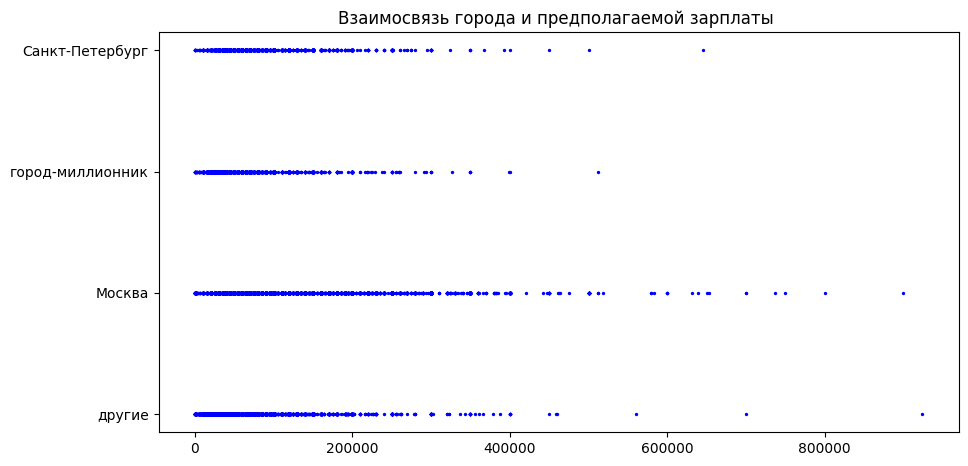

In [118]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Взаимосвязь города и предполагаемой зарплаты ', fontsize=12)
axes.scatter(
    x=hh_data[hh_data['ЗП (руб)'] < 1000000]['ЗП (руб)'], 
    y=hh_data[hh_data['ЗП (руб)'] < 1000000]['Город'], 
    s=2,
    marker='o',
    c = 'b'
);

Признак города важен в прогнозировании ЗП. Так в Москве самая высокая медианная ЗП, порядка 85 т.р. В Москве так же больший размах желаемых ЗП. В других городах и городах миллионниках этот показатель в два раза меньше  - 40 т.руб.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [119]:
trip_group = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
trip_group

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,False,False,40000.0
1,False,True,60000.0
2,True,False,50000.0
3,True,True,65335.0


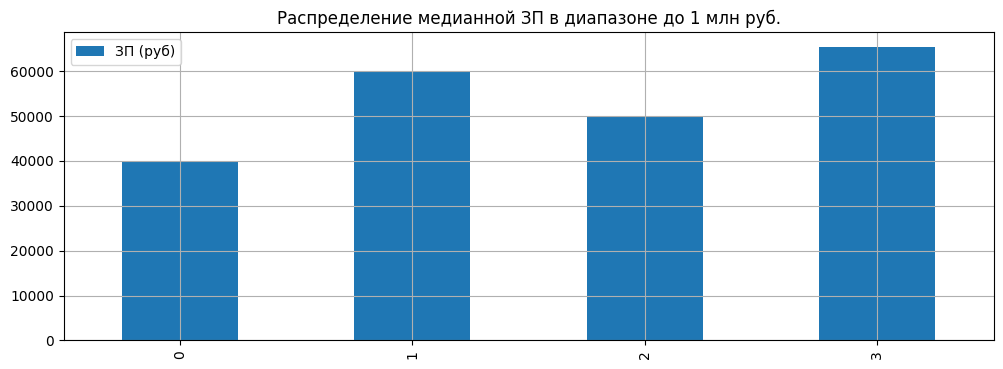

In [120]:
trip_group.plot(
    kind='bar',
    figsize=(12, 4),
    title='Распределение медианной ЗП в диапазоне до 1 млн руб.',
    grid = True,

);


Наиболее высокая ожидаемая ЗП в категории Готовых к перезду и командировкам, 65 тыс. руб., а наименьшая как раз таки у не готовых ни к переезду, ни к командировкам - 40 тыс. руб.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [121]:
pivot = hh_data.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median',
    fill_value=0
)
pivot

Образование,Высшее образование,Неоконченное высшее,Среднее образование,Среднее специальное
Возраст,,,,
14,60000.00,0.0,0.0,0.0
15,0.00,0.0,10000.0,2000.0
16,122582.49,0.0,0.0,30000.0
17,90075.50,80000.0,44000.0,25000.0
18,30000.00,25000.0,35000.0,25151.0
...,...,...,...,...
72,75000.00,0.0,0.0,0.0
73,62500.00,0.0,0.0,0.0
76,45000.00,0.0,0.0,0.0


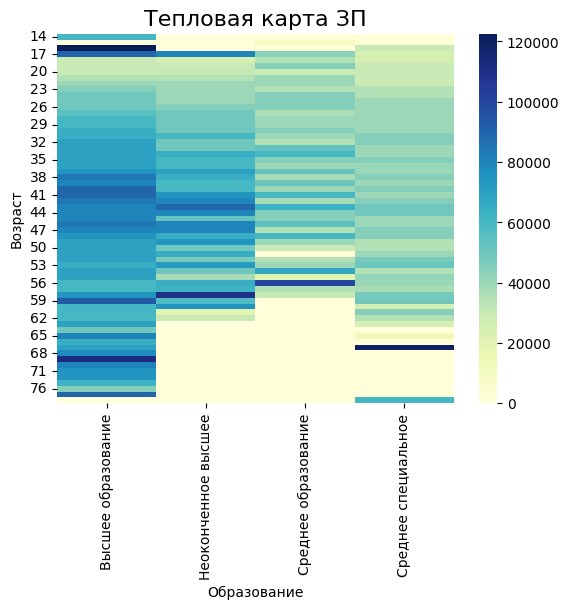

In [122]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ЗП', fontsize=16);

Исходя из анализа тепловой карты распределения медианной ЗП в зависимости от возраста и образования, можно сделать вывод, что Группа кандидатов имеющих высшее образование имеет более интенсивный нарастающий окрас, что свидетельствует о более быстрых темпах роста ЗП с возрастом и в целом более высокими ЗП. к 41 году наблюдается некоторое пиковое значение интенсивности цвета в данной группе - более высокой ЗП.Хуже всего проявляет себя среднее специальное образование: как по интенсивности окраса(уровень ЗП), так и по темпам его изменения.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

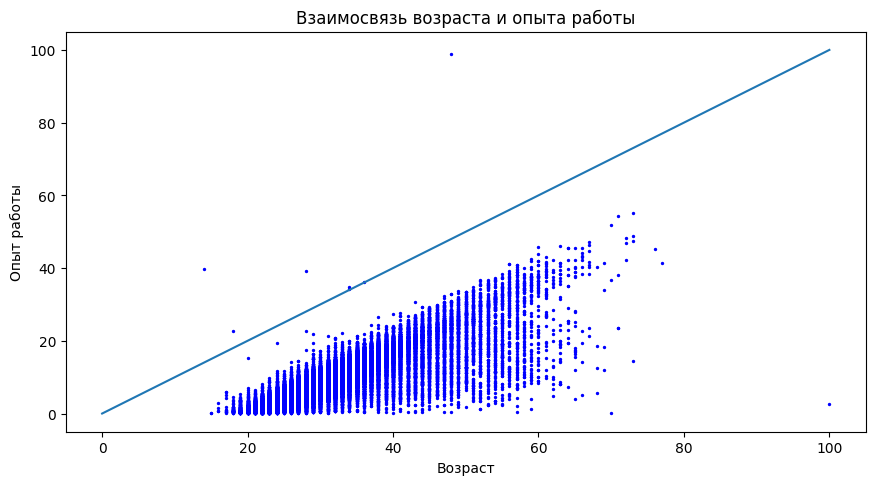

In [123]:
# делаем график интерактивным
# %matplotlib
# import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Взаимосвязь возраста и опыта работы', fontsize=12)
axes.set_xlabel('Возраст')
axes.set_ylabel('Опыт работы')
axes.scatter(
    x=hh_data['Возраст'], 
    y=hh_data['Опыт работы (месяц)']/12, 
    s=2,
    marker='o',
    c = 'b'
);
plt.plot((0, 100), (0, 100))
plt.show()

На данной диаграмме мы можем выявить 7 аномалий - выбросов, переведя график в интерактивный режим. И хотя на диаграмме представлены различные комбинации возраста и опыта работы, мы все же можем отметить некоторую концентрацию распределений по прямой зависимости опыта от возраста кандидата, что впрочем вполне логично. Однако есть много случаев, где это не имеет связи.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [124]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [125]:
dupl_columns = list(hh_data.columns)

mask = hh_data.duplicated(subset=dupl_columns)
hh_duplicates = hh_data[mask]
hh_dedupped = hh_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {df.shape[0]}')
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

Результирующее число записей: 44583
Число найденных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [126]:
hh_dedupped.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтерство                         0
Полный день                          0
Удаленная работа                     0
Сменный график                       0
Гибкий график                        0
Вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [127]:
# удалим строки с двумя пропущенными значениями: Место работы и должность
hh_dedupped.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])


#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {'Опыт работы (месяц)': hh_dedupped['Опыт работы (месяц)'].median()}

# заполним пропуски в столбце Опыт работы медианным значением 
hh_dedupped = hh_dedupped.fillna(values)
hh_dedupped.isnull().sum()


Ищет работу на должность:          0
Последнее/нынешнее место работы    1
Последняя/нынешняя должность       2
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
Полная занятость                   0
Частичная занятость                0
Проектная работа                   0
Стажировка                         0
Волонтерство                       0
Полный день                        0
Удаленная работа                   0
Сменный график                     0
Гибкий график                      0
Вахтовый метод                     0
ЗП (руб)                           0
dtype: int64

In [128]:
hh_dedupped['Опыт работы (месяц)'].mean()

114.3530493685934

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [129]:
outliers = hh_dedupped[(hh_dedupped['ЗП (руб)'] > 1000000) | (hh_dedupped['ЗП (руб)'] < 1000)]
print(f'Число выбросов: {outliers.shape[0]}')

# удалим выбросы
hh_dedupped = hh_dedupped.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')


Число выбросов: 89
Результирующее число записей: 44494


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [130]:
# найдем выбросы
outliers = hh_dedupped[(hh_dedupped['Опыт работы (месяц)']/12 > hh_dedupped['Возраст'])]
print(f'Число выбросов: {outliers.shape[0]}')

# удалим выбросы
hh_dedupped = hh_dedupped.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Число выбросов: 7
Результирующее число записей: 44487


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

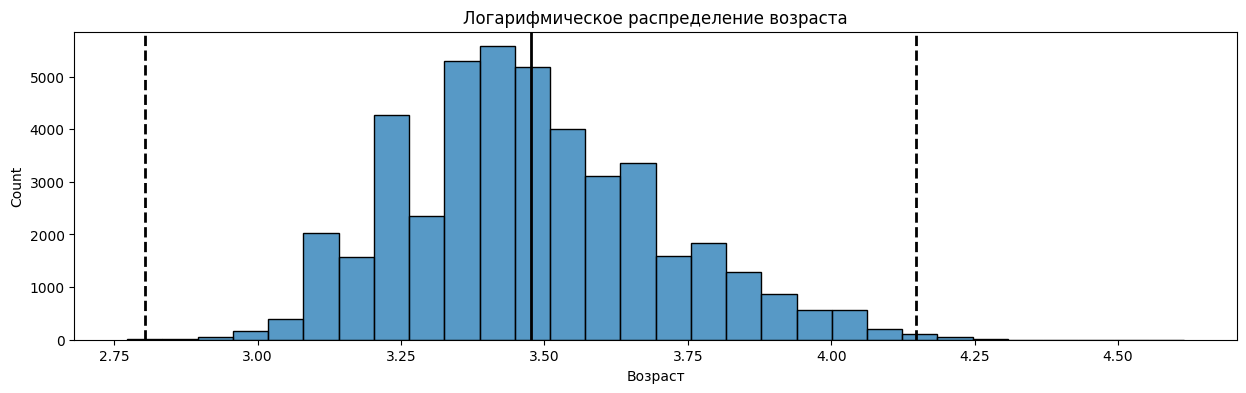

In [131]:
#гистограмма в логарифмическом масштабе
axes = plt.subplots(figsize=(15, 4))
log_age= np.log(hh_dedupped['Возраст'] + 1)
histplot = sns.histplot(log_age , bins=30, ax=axes[1])
histplot.set_title('Логарифмическое распределение возраста')
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2);

Среднее значение правее моды, это распределение с правосторонней асеметрией. Также есть наблюдения, которые не входят в наш интервал, как слева так и справа, но в основном справа.

In [133]:
# создадим функцию, реализующую алгоритм метода z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_dedupped, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 112
Результирующее число записей: 44375
